# IPL DATA ANALYSIS (2008 - 2019)

Indian Premier League more popularly called as IPL is a Cricket Tournament hoisted by the Cricket Board of India (BCCI). Players from different countries participate in IPL making it an exciting oppurtunity to entertain cricket lovers. IPL was established in 2008 when the first season of IPL was hoisted. Since then every year the IPL game is played and celebrated as a month long cricket festival for Indians and cricket lovers throughout the world. IPL also gives opppurtunities to the young players to showcase their talent and improve their experience by playing with some of the best and experienced players of cricket.

In this project I am going to go through two datasets of IPL matches in INDIA ,observe the data, analyze and process it and going to answer few common questions about the dataset that would generally bug you. Go through the notebook carefully and enjoy the different observations made by me .
### About the Datasets:

The given dataset was taken from the dataset bundle present in Kaggle Datasets, Refer to this link [IPL 2008-2019 Kaggle Dataset](https://www.kaggle.com/nowke9/ipldata) to get more information about the dataset and download it from Kaggle to work with it.

With this dataset I am trying to visualize different trends in IPL score of teams and players from 2008 to 2019, As the current season IPL 2020 is ongoing it would be fun and helpful to know the stats of teams and players visually for the last 11 years. Hope you will enjoy the visualization provided by me. 

The name of the Dataset used for this projects are `matches.csv` and `deliveries.csv`. There are 756 rows in the `matches.csv` file each row containing data about a specific match. The `deliveries.csv` dataset is a huge one with over `1.79 Lakhs` of rows of data and every row represents data from each delivery from each match for the last 11 years. 

I will be using Python 3 for this analysis, And am doing this project in Jupyter Notebook(Kaggle and Google Collab are also good options to run this notebook and work with it). The Libraries/Packages I will be using in this projects are as followed.
* __jovian__ (to upload, save and share the contents of my notebook)
* __numpy__ (as np is one of the very famous packages for working with arrays in python)
* __pandas__ (Is greatly used in analysis of data and making dataframe)
* __matplotlib__ (Lets make our Analyzation fun and interative with the visualization library matplotlib)
* __seaborn__ (Adding more colours into matplotlib visualization)
* __collections__ (specialized container datatypes providing alternatives to Python's general purpose built-in containers like dict, list etc.)
* __opendatasets__ (A great library to fetch data from Kaggle or from its own content)

If you want to run this notebook in your machine the steps to do so are given at the end of the Project.# IPL DATA ANALYSIS (2008 - 2019)

Indian Premier League more popularly called as IPL is a Cricket Tournament hoisted by the Cricket Board of India(BCCI). Players from different countries participate in IPL making it an exciting oppurtunity to entertain cricket lovers. IPL was established in 2008 when the first season of IPL was hoisted. Since then every year the IPL game is played and celebrated as a month long cricket festival for Indians and cricket lovers throughout the world. IPL also gives opppurtunities to the young players to showcase their talent and improve their experience by playing with some of the best and experienced players of cricket. As the current season of IPL(2020) is ongoing let us all revise and analyze the performance of players in the previous Seasons.

In this project I am going to go through two datasets of IPL matches in India, observe the data, analyze and process it and going to answer few common questions about the dataset that would generally bug you. Go through the notebook carefully and enjoy the different observations made by me.


## Table Of Contents

* Importing Packages

* Fetching The dataset

* Data Preparation And Cleaning

    * Data Preparation For The Matches Dataframe
    * Data Preparation For The Deliveries Dataframe
    
* Exploratory Analysis and Visualization
    
    * Matches DF Analysis
        
       * Toss Decision Visualisation
       * Matches Hosted By Each City
       * The Top 10 Biggest Victory Margins, Both Through Runs & Wickets
       * Total Matches In Each Season
       * Matches Played & Won By Each Team
       * Matches Won By The Home Team & The Away Team
    
    * Deliveries DF Analysis
    
       * Different Kinds Of Batsmen Dismissal
       * Most Matches Played By Batsmen & Bowlers
       * Most 6s &  4s Hit By Batsmen
       * Most Wickets Taking Bowlers
       * Bowlers Who Bowled The Most Deliveries
       
* Asking And Answering Questions
    
    * Who Won The Most Man Of The Match Awards?
    * How Many Matches Were There Where The Toss Winner Also Won The Match?
    * How Did The Top Bowlers Dismiss The Batsmen?
    * Who Were The Batsmen Who Struggled Against A Particular Bowler?
    * Who Were The Top 10 Batsmen Based On Runs Scored & Who Were The Top 10 Batsmen That Were Dismissed The Most?
    * Who Were The Top Batsmen Based On Batting Average?
    
* Inferences And Conclusion

* Reference And Future Works

* Steps To Run The Notebook

In [1]:
project_name = "ipl-data-analysis(2008-2019)" 

In [2]:
!pip install opendatasets --upgrade -q
!pip install jovian --upgrade -q

In [3]:
#Installing the upgraded version of all libraries.

!pip install numpy pandas matplotlib seaborn --upgrade --quiet

In [4]:
# Let us begin with importing all the required packages

import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from collections import Counter
%matplotlib inline

## Fetching The Dataset

In [5]:
# Using Opendataset to fetch the data from Kaggle
# To prevent the dataset to download everytime you run this code we are using os.path.isfile
# to check if the required file is present in the directory or not. 
import os
if not (os.path.isfile('./ipldata/matches.csv') and os.path.isfile('./ipldata/deliveries.csv')):
    print("File not present Downloading Files.....")
    dataset_url = 'https://www.kaggle.com/nowke9/ipldata'
    od.download(dataset_url)
else:
    print("File Present in Directory skipping the download.")

File not present Downloading Files.....
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aseembathla
Your Kaggle Key: ········


100%|██████████| 1.20M/1.20M [00:00<00:00, 49.4MB/s]

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aseembathla19/ipl-data-analysis-2008-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019


'https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019'

## Data Preparation and Cleaning

In this section, I explored the data from the surface level and did the required cleaning and preparation for the analysis



### Matches DF

In [9]:
# reading the matches dataset.

matches = pd.read_csv('ipldata/matches.csv')

In [10]:
# displaying the data of the dataset.

matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [11]:
# getting general info about the dataset.

matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### 1. As seen above, there are 756 venues whereas there are 749 cities, implying there are some (7) missing values in the city column.
#### 2. There are 754 values in umpire1 and umpire2 column instead of 756. 
#### 3. There are 752 winner values, this may be due to matches being tied or matches having no result (because of rain).

In [12]:
## Finding the venues where the city value is missing.

matches.venue[matches.city.isnull()]

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [13]:
## Checking if ALL the matches played at DUbai International Cricket Stadium have missing city value.

matches[matches.venue == 'Dubai International Cricket Stadium']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [14]:
# Filling up the city column when the matches have venue Dubai International Cricket Stadium with "Dubai".

matches.loc[matches[matches['venue'] == 'Dubai International Cricket Stadium'].index, "city"] = "Dubai"

In [15]:
# Finding out the two rows where the values of umpire1 column are missing.

matches[matches.umpire1.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [16]:
# Filling those values (of umpire2 too) using a quick google search.

matches.loc[4, 'umpire1'] = 'C Shamshuddin'
matches.loc[4, 'umpire2'] = 'CK Nandan'

matches.loc[753, 'umpire1'] = 'Bruce Oxenford'
matches.loc[753, 'umpire2'] = 'Sundaram Ravi'

In [17]:
# Checking data type of Date column.

matches['date']

0      2017-04-05
1      2017-04-06
2      2017-04-07
3      2017-04-08
4      2017-04-08
          ...    
751      05/05/19
752      07/05/19
753      08/05/19
754      10/05/19
755      12/05/19
Name: date, Length: 756, dtype: object

In [18]:
# Converting the date column's data type into datetime data time of python (which would standardise the column).

matches['date'] = pd.to_datetime(matches.date)

In [19]:
matches['date']

0     2017-04-05
1     2017-04-06
2     2017-04-07
3     2017-04-08
4     2017-04-08
         ...    
751   2019-05-05
752   2019-07-05
753   2019-08-05
754   2019-10-05
755   2019-12-05
Name: date, Length: 756, dtype: datetime64[ns]

In [20]:
# Finding all the names of the teams that compete in the IPL.

matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### 1. As seen above, there are multiple names for the same team, i.e,  `Rising Pune Supergiants` and  `Rising Pune Supergiant`. This is because of the omission of `s`, we shall fix that.
#### 2. `Delhi Capitals`  and `Delhi Daredevils` are the names of the same team. The team representing Delhi, which was Delhi Daredevils changed its name to Delhi Capitals in 2018. So, for simplification, we will change the values where Delhi Daredevils is used to Delhi Capitals.

These will be the columns that would require fixing:
1. team1
2. team2
3. winner

In [21]:
#Using replace method in pandas library to fix the team name errors.

matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [22]:
# Checking all the names of the teams that compete in the IPL again for confirmation of the fix.

matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [23]:
# Finding out matches where there was no result.

matches[matches.result == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


#### As seen above, there might be multiple names for the same city, just like in the case of `Bangalore` and `Bengaluru`.

In [24]:
# Finding all the unique values in the city column

matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [25]:
# Fixing the Bangalore and Bengaluru error.

matches.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aseembathla19/ipl-data-analysis-2008-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019


'https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019'

### Deliveries DF

In [27]:
# Loading the Deliveries Dataframe which would be used later for some Ball by Ball Analysis.

deliveries_df = pd.read_csv('ipldata/deliveries.csv')

In [28]:
# Displaying the data.

deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [29]:
# Finding out the all the team names.

deliveries_df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### As seen above, Deliveries dataframe has the same errors as Matches dataframe (Rising Pune Supergiants and Delhi Daredevils).

The following columns would require the fixing:
1. batting_team
2. bowling_team

In [30]:
# Fixing the errors using the replace function.

deliveries_df.batting_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
deliveries_df.bowling_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [31]:
# Checking all the names of the teams that compete in the IPL again for confirmation of the fix.

deliveries_df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aseembathla19/ipl-data-analysis-2008-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019


'https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019'

## Exploratory Analysis and Visualization

#### This section contains general analysis of both the matches and the deliveries dataframe in the form of tables and graphs.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Matches Dataframe

### Toss Decisions Visualisation

In [34]:
# How many times teams decided to bat or bowl.

toss_decision = matches.toss_decision.value_counts()
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

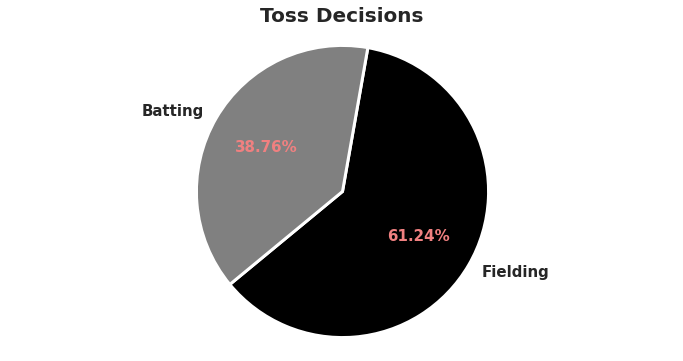

In [35]:
# Visualising the toss decisions.

fielding = toss_decision[0]
batting = toss_decision[1]
toss_decisions = [fielding, batting]
labels = ["Fielding", 'Batting']
colors = ['Black', "Grey"]
plt.title("Toss Decisions", fontweight='bold', fontsize = 20)
patches, texts, pcts = plt.pie(toss_decisions, colors = colors, labels = labels, autopct = "%.2f%%", startangle = 80, counterclock = False, 
                               wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'}, textprops= {'fontsize': 15, 'fontweight' : 'bold'})
plt.axis('equal');

plt.setp(pcts, color='lightcoral', fontweight='bold', fontsize = 15);

As seen from the above visualisation, `teams` tend to `field first` in the Indian Premier League.

### Matches Hosted By Each City

In [36]:
# Using the groupby functionality of pandas, here we first group by the data using city and then count the matches that 
# happened in each city by aggregating the ID column using count().

matches_per_city_df = matches.groupby('city')[['id']].count()
matches_per_city_df = matches_per_city_df.sort_values('id', ascending = False).reset_index()

In [37]:
# Renaming the columns.

matches_per_city_df.rename(columns = {'id' : 'matches'}, inplace = True)
matches_per_city_df

,city,matches
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


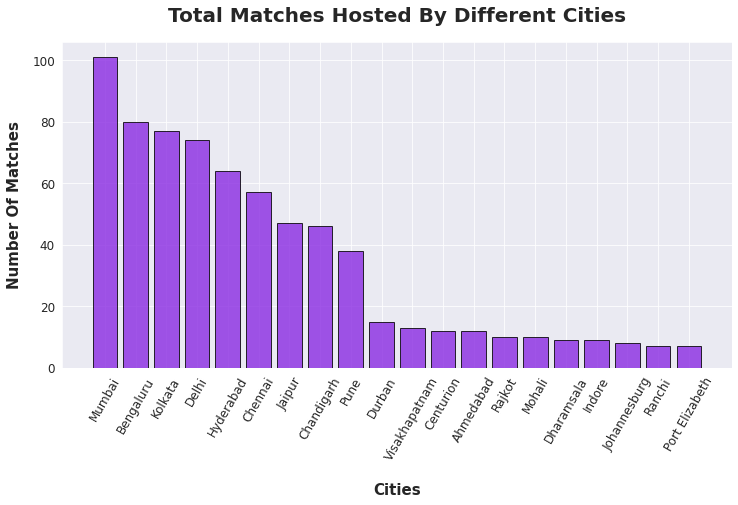

In [38]:
# Plotting the visualisation for the top 20 cities who hosted the most matches.

plt.bar(matches_per_city_df['city'][:20], matches_per_city_df['matches'][:20], alpha = 0.8, 
        color = 'blueviolet', edgecolor = 'black')
plt.title('Total Matches Hosted By Different Cities', pad = 20, fontweight='bold', fontsize = 20)
plt.ylabel('Number Of Matches', labelpad = 10, fontweight='bold', fontsize = 15)
plt.xlabel('Cities', labelpad = 20, fontweight='bold', fontsize = 15)
plt.xticks(rotation=60);


####  Why have some cities hosted less than twenty games?
1. The 2009 Indian Premier League season, abbreviated as IPL 2 or the 2009 IPL, was the second season of the Indian Premier League. The tournament was hosted by South Africa and was played between 18 April and 24 May 2009.'
2. The tournament was held in 8 cities: Cape Town, Johannesburg, Durban, Centurion(Pretoria), East London, Kimberly, Bloemfontein and Port Elizabeth.
3. Mohali having hosted less matches has multiple reasons, one of them being renovation in 2011 and another one of them being, the home tem (Kings XI Punjab) losing many matches there which attracts less crowd, hence, less revenue, so some of the home matches of Kings XI Punjab were played at Dharamsala & Indore.
4. Some of the cities like Ahemdabad were introduced later on as a venue, and having no team representing the state, less matches were conducted there.
5. Similarly, Rajkot has hosted less number of matches because the team representing the state (Gujarat Lions) played only two seasons of IPL (2016 & 2017) as it was one of the two replacement teams

### The Top 10 Biggest Victory Margins, Both Through Runs & Wickets.

In [39]:
# Creating a loser column in the dataframe.

loser = []
for i in range(756):
    if matches['winner'][i] == matches['team1'][i]:
        loser.append(matches['team2'][i])
    elif matches['winner'][i] == matches['team2'][i]:
        loser.append(matches['team1'][i])
    else:
        loser.append(matches['winner'][i])

matches['loser'] = loser

In [40]:
# Finding out the top 10 biggest margin of victories by runs

largest_runs_wins = matches.win_by_runs.sort_values(ascending = False)[0:10]
matches.loc[largest_runs_wins.index][['date', 'winner','loser', 'win_by_runs']].reset_index()

,index,date,winner,loser,win_by_runs
0,43,2017-05-06,Mumbai Indians,Delhi Capitals,146
1,619,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,144
2,59,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,140
3,556,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,138
4,410,2013-04-23,Royal Challengers Bangalore,Pune Warriors,130
5,706,2019-03-31,Sunrisers Hyderabad,Royal Challengers Bangalore,118
6,295,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,111
7,114,2008-05-30,Rajasthan Royals,Delhi Capitals,105
8,676,2018-09-05,Mumbai Indians,Kolkata Knight Riders,102
9,182,2010-03-17,Mumbai Indians,Delhi Capitals,98


In [41]:
# Finding out the top 10 biggest margin of victories by wickets

largest_wickets_wins = matches.win_by_wickets.sort_values(ascending = False)[0:10]
matches.loc[largest_wickets_wins.index][['date', 'winner','loser', 'win_by_wickets']].reset_index()

,index,date,winner,loser,win_by_wickets
0,119,2009-04-19,Delhi Capitals,Kings XI Punjab,10
1,390,2013-04-10,Chennai Super Kings,Kings XI Punjab,10
2,34,2017-04-30,Kings XI Punjab,Delhi Capitals,10
3,590,2016-04-21,Sunrisers Hyderabad,Gujarat Lions,10
4,71,2008-04-27,Deccan Chargers,Mumbai Indians,10
5,683,2018-05-14,Royal Challengers Bangalore,Kings XI Punjab,10
6,298,2011-05-20,Rajasthan Royals,Mumbai Indians,10
7,376,2012-05-20,Mumbai Indians,Rajasthan Royals,10
8,542,2015-04-26,Royal Challengers Bangalore,Delhi Capitals,10
9,183,2010-03-18,Royal Challengers Bangalore,Rajasthan Royals,10


### Total Matches In Each Season.

In [42]:
# Using the group by functionality of pandas, grouping based on the season and id columns and aggregating using count.

total_matches_per_year = matches.groupby('season')[['id']].count()
total_matches_per_year

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


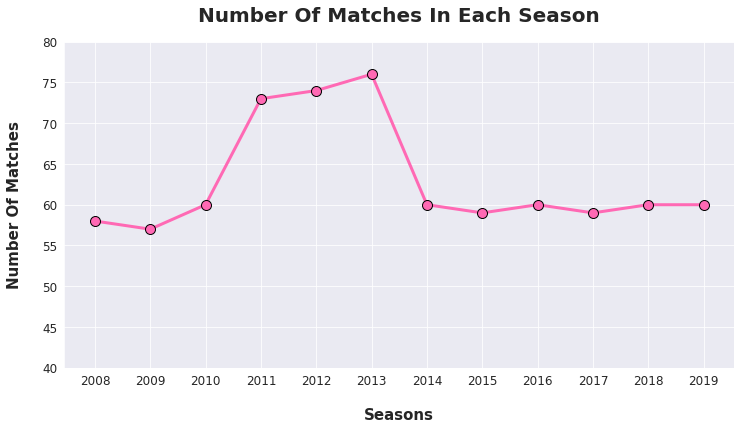

In [43]:
# Visualising the number of matches in a season using a line chart.

plt.title('Number Of Matches In Each Season', pad = 20, fontweight='bold', fontsize = 20)
plt.xlabel("Seasons", labelpad = 20, fontweight='bold', fontsize = 15)
plt.ylabel("Number Of Matches", labelpad = 20, fontweight='bold', fontsize = 15)
plt.xticks(total_matches_per_year.index)
x = total_matches_per_year.index
y = total_matches_per_year.id
plt.plot(x, y, marker = 'o', markeredgecolor = 'black', linewidth = 3, markersize = 10, linestyle = "-", color = 'hotpink');
plt.ylim(40, 80);


#### Why there were are more matches in 2011, 2012 and 2013?
1. In 2011, two new teams were introduced in the IPL, Kochi Tuskers Kerala & Pune Warriors India. This meant that the IPL now had 10 teams instead of 8 teams which can explain the increase in number of matches.
2. In 2011 end, Kochi Tuskers Kerala was terminated because they failed to pay the 10% bank guarantee they had agreed to pay the IPL committee despite several reminders from the BCCI. They were removed from the IPL in October 2011. By December, they were gone. So, for the 2012 season, they had to form a new format for 9 teams now instead of 10, hence, the increase in matches again (though, only slight increase).
3. In 2013, just like Kochi Tuskers Kerala, Pune Warriors India were terminated for failing to furnish a bank guarantee worth Rs 170 crore for the next season.
4. Hence, since 2014, there have bn a similar number of matches being played in the IPL amongst 8 teams.

### Matches Played & Won By Each Team

In [44]:
# Concatenating (joining on axis = 0) the two teams (team1 and team 2) columns and then using value_count() to determine the number of matches
# played by each team.

total_matches = pd.concat([matches['team1'], matches['team2']])
total_matches_per_team = total_matches.value_counts().reset_index()
total_matches_per_team.columns = ['Teams', 'Total Matches']
total_matches_per_team

,Teams,Total Matches
0,Mumbai Indians,187
1,Royal Challengers Bangalore,180
2,Kolkata Knight Riders,178
3,Delhi Capitals,177
4,Kings XI Punjab,176
5,Chennai Super Kings,164
6,Rajasthan Royals,147
7,Sunrisers Hyderabad,108
8,Deccan Chargers,75
9,Pune Warriors,46


In [45]:
# Using the groupby functionality of pandas, creating a df of wins by each team by grouping on winner column and counting the
# id using count aggregate function.

wins = matches.groupby('winner')[['id']].count()
wins_per_each_team = wins.sort_values(by = 'id', ascending = False).reset_index()
wins_per_each_team.columns = ["Teams", "Wins"]
wins_per_each_team

,Teams,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


In [46]:
# Merging the total matches and total wins datasets and calculating the winning percentage.

matches_and_wins = total_matches_per_team.merge(wins_per_each_team, on = 'Teams')
matches_and_wins['Winning Percentage'] = round((matches_and_wins['Wins']/matches_and_wins['Total Matches']) * 100, 2)
matches_and_wins

,Teams,Total Matches,Wins,Winning Percentage
0,Mumbai Indians,187,109,58.29
1,Royal Challengers Bangalore,180,84,46.67
2,Kolkata Knight Riders,178,92,51.69
3,Delhi Capitals,177,77,43.50
4,Kings XI Punjab,176,82,46.59
5,Chennai Super Kings,164,100,60.98
6,Rajasthan Royals,147,75,51.02
7,Sunrisers Hyderabad,108,58,53.70
8,Deccan Chargers,75,29,38.67
9,Pune Warriors,46,12,26.09


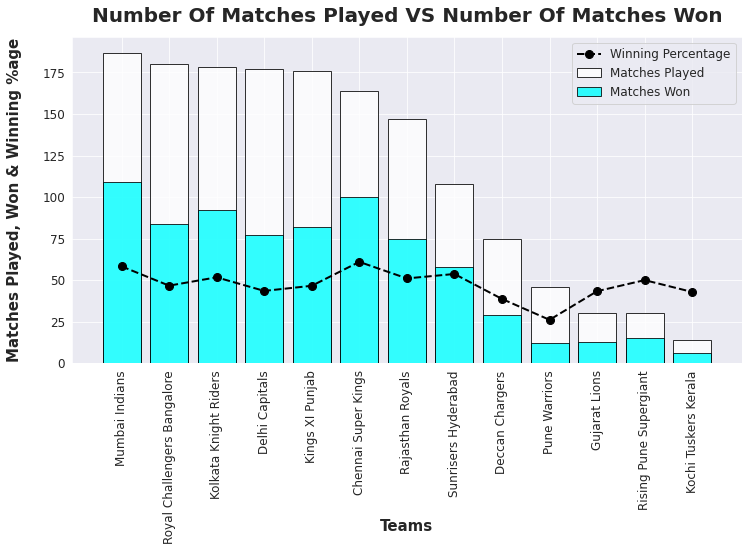

In [47]:
# Visualising tha bove dataframe.

plt.xticks(rotation=90)
plt.bar(matches_and_wins['Teams'], matches_and_wins['Total Matches'], alpha = 0.8, color = 'white', edgecolor = 'black')
plt.bar(matches_and_wins['Teams'], matches_and_wins['Wins'], alpha = 0.8, color = 'cyan', edgecolor = 'black')
plt.plot(matches_and_wins.Teams, matches_and_wins['Winning Percentage'], color = 'black', marker = 'o', linewidth = 2, markersize = 8, linestyle = '--')
plt.legend(['Winning Percentage','Matches Played','Matches Won']);
plt.title('Number Of Matches Played VS Number Of Matches Won',fontweight = 'bold', pad = 15, fontsize = 20)
plt.xlabel('Teams', labelpad = -25, fontweight='bold', fontsize = 15)
plt.ylabel('Matches Played, Won & Winning %age', labelpad = 20, fontweight='bold', fontsize = 15);

`Mumbai Indians` have the best winning percentage which is `58.29%`.

### Matches Won By The Home Team & The Away Team

Home team is a team which plays the match in its own city and away team is the team it plays against.

In [48]:
# Creating an empty dictionary, the idea is to map each team with its city.

dictionary = {}

In [49]:
# Putting Teams as keys in the dictionary and None as values.

for i in matches_and_wins.Teams:
    if i in dictionary:
        pass
    else:
        dictionary[i] = None

In [50]:
dictionary

{'Mumbai Indians': None,
 'Royal Challengers Bangalore': None,
 'Kolkata Knight Riders': None,
 'Delhi Capitals': None,
 'Kings XI Punjab': None,
 'Chennai Super Kings': None,
 'Rajasthan Royals': None,
 'Sunrisers Hyderabad': None,
 'Deccan Chargers': None,
 'Pune Warriors': None,
 'Gujarat Lions': None,
 'Rising Pune Supergiant': None,
 'Kochi Tuskers Kerala': None}

In [51]:
# Creating a list of (home) cities in the order of the keys of dictionary.

cities = ['Mumbai', 'Bengaluru', 'Kolkata', 'Delhi', 'Mohali', 'Chennai', 'Jaipur', 'Hyderabad', 'Hyderabad', 'Pune', 'Rajkot', 'Pune', 'Kochi']

In [52]:
# Making cities as the values of the keys in the dictionary.

j = 0
for i in dictionary:
    dictionary[i] = cities[j]
    j += 1

In [53]:
# Dictionary with teams as keys and their home cities as values.

dictionary

{'Mumbai Indians': 'Mumbai',
 'Royal Challengers Bangalore': 'Bengaluru',
 'Kolkata Knight Riders': 'Kolkata',
 'Delhi Capitals': 'Delhi',
 'Kings XI Punjab': 'Mohali',
 'Chennai Super Kings': 'Chennai',
 'Rajasthan Royals': 'Jaipur',
 'Sunrisers Hyderabad': 'Hyderabad',
 'Deccan Chargers': 'Hyderabad',
 'Pune Warriors': 'Pune',
 'Gujarat Lions': 'Rajkot',
 'Rising Pune Supergiant': 'Pune',
 'Kochi Tuskers Kerala': 'Kochi'}

In [54]:
# Creating a df containing only city, team1 and team2 columns.

city_teams_df = matches[['city', 'team1', 'team2']]

In [55]:
# Creating a list of home teams, the idea is to create a list consisting of home team in each match and then using it
# as a column.

home_team = []

In [56]:
# Seeing the city in which the match took place, and appending the home team list using keys and values of the dictionary.
# If both teams' cities do not match, then it is a neutral venue.

for i in range(756):
    if dictionary[city_teams_df.team1[i]] == city_teams_df.city[i]:
        home_team.append(city_teams_df.team1[i])
    elif dictionary[city_teams_df.team2[i]] == city_teams_df.city[i]:
         home_team.append(city_teams_df.team2[i])
    else:
         home_team.append("Neutral")

In [57]:
# Making the home team list as a column of the dataset.

matches['home_team'] = home_team

In [58]:
# Creating a list of away teams, the idea is to create a list consisting of away team in each match and then using it
# as a column.


away_team = []

# Seeing the city in which the match took place, and appending the away team list using keys and values of the dictionary. 
# If both teams' cities do not match, then it is a neutral venue.

for i in range(756):
    if matches.home_team[i] == matches.team1[i]:
        away_team.append(matches.team2[i])
    elif matches.home_team[i] == matches.team2[i]:
        away_team.append(matches.team1[i])
    else:
        away_team.append(matches.home_team[i])

In [59]:
# Checking total neutral matches

len(matches[matches.home_team == 'Neutral'])

237

In [60]:
# Making the away team list as a column of the dataset.

matches['away_team'] = away_team

In [61]:
# Finding out the matches which had no result.

matches[matches.result == "no result"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,loser,home_team,away_team
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,no result,0,...,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN,NaN,Delhi Capitals,Pune Warriors
545,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,...,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
570,571,2015,Bengaluru,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,...,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN,NaN,Royal Challengers Bangalore,Delhi Capitals
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,...,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary,NaN,Royal Challengers Bangalore,Rajasthan Royals


In [62]:
# Removing the matches which had "no result".

matches_with_result = matches[matches.result != 'no result'].reset_index(drop = True)

In [63]:
# Caculating home team wins and away team wins by comparing the winner column with the home team column and away team column.

home_team_wins = 0
away_team_wins = 0
neutral_matches= 0

for i in range(752):
    if matches_with_result.winner[i] == matches_with_result.home_team[i]:
        home_team_wins += 1 
    elif matches_with_result.winner[i] == matches_with_result.away_team[i]:
        away_team_wins += 1
    elif matches_with_result.home_team[i] == "Neutral":
        neutral_matches += 1

In [64]:
# Number of home team wins.

home_team_wins 

293

In [65]:
# Number of away team wins.


away_team_wins 

222

In [66]:
# Number of neutral matches.

neutral_matches

237

In [67]:
# Creating a list of team type and results to visualise.

team_type = ["Home Team", "Away Team"]
team_type_results = [home_team_wins, away_team_wins]

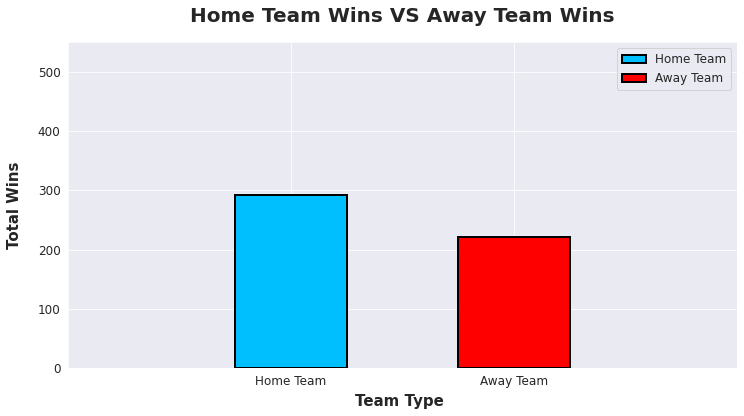

In [68]:
# Visualising the home team and away team wins.

color = ['deepskyblue', 'red']
plt.bar(team_type[0], team_type_results[0], color = 'deepskyblue', width = 0.5, edgecolor = 'black', linewidth = 2)
plt.bar(team_type[1], team_type_results[1], color = 'red', width = 0.5, edgecolor = 'black', linewidth = 2)
plt.title('Home Team Wins VS Away Team Wins', fontweight = 800, fontsize = 20, pad = 20 )
plt.xlabel('Team Type ', fontweight = 800, labelpad = 5.5, fontsize = 15)
plt.ylabel('Total Wins', fontweight = 800, labelpad = 15.5, fontsize = 15)
plt.axis([-1, 2, 0 , 550])
plt.legend(['Home Team', 'Away Team']);


As we can see by the visualisation, there is only `slight advantage` to the team playing in front of their home croud and the match can go either way.

## Deliveries DF Analysis

### DIfferent Kinds Of Batsmen Dismissal

In [69]:
# Using the group by functionality of pandas to group the dataset based on dismissal kind and aggregating using count.

dismissal_kind_df = deliveries_df.groupby('dismissal_kind')[['match_id']].count()

In [70]:
# Renaming the columns.

dismissal_kind_df = dismissal_kind_df.rename(columns = {'dismissal_kind' : 'dismissal_type', 'match_id' : 'count'})

In [71]:
# Sorting the values based on the amount of times batsmen have been dismissed in a certain way (descending).

dismissal_kind_df = dismissal_kind_df.sort_values(by = 'count', ascending = False).reset_index()

In [72]:
dismissal_kind_df

,dismissal_kind,count
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


In [73]:
# Since the values of hit wicket, retired hurt,obstructing the field have very less values, so for better interpretation
# of the visualisation, i decided to drop them.

dismissal_kind_df_sig = dismissal_kind_df.drop([6,7,8])

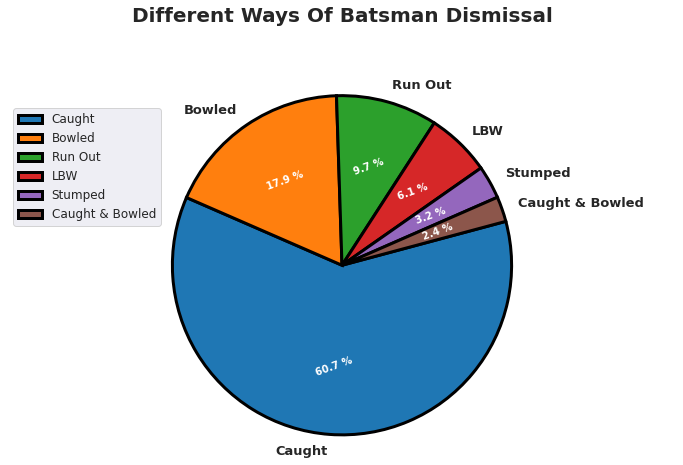

In [74]:
# Visualising the dataframe.

sizes = dismissal_kind_df_sig['count']
labels = ['Caught', 'Bowled', 'Run Out', 'LBW', 'Stumped', 'Caught & Bowled']
plt.title('Different Ways Of Batsman Dismissal', pad = 80, fontweight='bold', fontsize = 20)
plt.axis('equal')
patches, texts, pcts  = plt.pie(sizes, labels = labels, autopct = "%.1f %%", startangle = 15, counterclock = False, radius = 1.3, 
         wedgeprops = {'linewidth': 3.0, 'edgecolor': 'black'}, textprops={'fontsize': 13, 'fontweight' : 'bold'});
plt.setp(pcts, color='white', fontweight='bold', fontsize = 10, rotation = 20);
plt.legend(['Caught', 'Bowled', 'Run Out', 'LBW', 'Stumped', 'Caught & Bowled'], loc = 'upper left');


As seen by the visualisation, batsmen get `caught` out most often, followed by getting `bowled` and getting dismissed by `leg before wicket`.

### Most Matches Played By Batsmen & Bowlers

In [75]:
# Here we use the group by functionality of Pandas to group the dataset by batsmen, and then aggregate matchid column by using
# lambda and creating a set (of match ids)  and then sorting it based on the length of set (descending).

most_match_bats = deliveries_df.groupby(['batsman']).agg({'match_id': lambda x:len(set(x))}).sort_values(ascending = False, by = 'match_id')
most_match_bats[:15]

,match_id
batsman,
SK Raina,189
RG Sharma,182
RV Uthappa,170
MS Dhoni,170
V Kohli,169
KD Karthik,162
S Dhawan,158
YK Pathan,153
G Gambhir,151


In [76]:
# Here we use the group by functionality of Pandas to group the dataset by bowlers, and then aggregate matchid column by using
# lambda and creating a set (of match ids)  and then sorting it based on the length of set (descending).

most_match_bowlers = deliveries_df.groupby(['bowler']).agg({'match_id': lambda x: len(set(x))}).sort_values(ascending = False, by = 'match_id')
most_match_bowlers[:15]

,match_id
bowler,
Harbhajan Singh,157
PP Chawla,156
A Mishra,147
RA Jadeja,142
R Ashwin,136
DJ Bravo,131
SL Malinga,122
P Kumar,119
UT Yadav,118


### Most 6s &  4s Hit By Batsmen

In [77]:
# Using the value_counts functionality of pandas to count the batsmen who hit most sixes.

big_hitters = deliveries_df.batsman[deliveries_df.batsman_runs == 6].value_counts()[:15]
big_hitters

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
RV Uthappa        156
Yuvraj Singh      149
BB McCullum       129
AT Rayudu         120
AD Russell        119
Name: batsman, dtype: int64

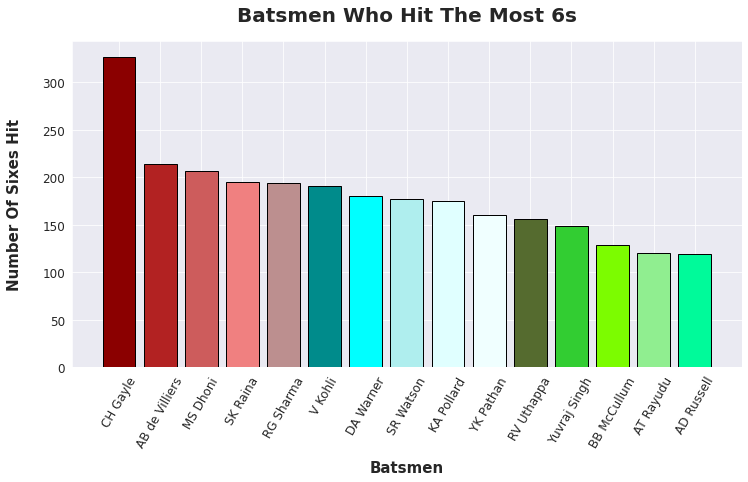

In [78]:
# visualising the result.

colors = ['darkred', 'firebrick', 'indianred', 'lightcoral', 'rosybrown', 'darkcyan', 'cyan', 'paleturquoise', 'lightcyan', 'azure', 'darkolivegreen', 'limegreen', 'lawngreen', 'lightgreen', 'mediumspringgreen']
plt.bar(big_hitters.index,big_hitters.values, color = colors, edgecolor = 'black')
plt.xticks(rotation = 60)
plt.title('Batsmen Who Hit The Most 6s', pad = 20, fontweight='bold', fontsize = 20)
plt.xlabel('Batsmen', labelpad = 10, fontweight='bold', fontsize = 15)
plt.ylabel('Number Of Sixes Hit', labelpad = 20, fontweight='bold', fontsize = 15);

In [79]:
# Using the value_counts functionality of pandas to count the batsmen who hit most sixes.

gap_finders = deliveries_df.batsman[deliveries_df.batsman_runs == 4].value_counts()[:15]
gap_finders

S Dhawan          526
SK Raina          495
G Gambhir         492
V Kohli           482
DA Warner         459
RV Uthappa        436
RG Sharma         431
AM Rahane         405
CH Gayle          376
PA Patel          366
KD Karthik        358
AB de Villiers    357
SR Watson         344
V Sehwag          334
MS Dhoni          297
Name: batsman, dtype: int64

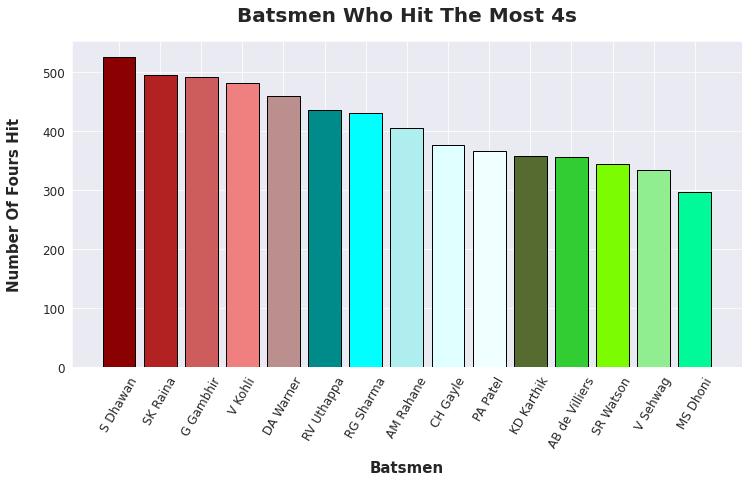

In [80]:
# Using the value_counts functionality of pandas to count the batsmen who hit most fours.

plt.bar(gap_finders.index,gap_finders.values, color = colors, edgecolor = 'black')
plt.xticks(rotation = 60)
plt.title('Batsmen Who Hit The Most 4s', pad = 20, fontweight='bold', fontsize = 20)
plt.xlabel('Batsmen', labelpad = 10, fontweight='bold', fontsize = 15)
plt.ylabel('Number Of Fours Hit', labelpad = 20, fontweight='bold', fontsize = 15);

`Raina`, `Warner`, `Kohli`, `Uthappa`, `R Sharma`, `Gayle` being in top 10 of both the lists makes them the most boundary hitting and dangerous batsmen,

### Most Wickets Taking Bowlers

In [81]:
# Notice hoe there are many Nans in the player_dismissed column.

deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [82]:
# Replacing the NaNs in player dismissed column with zeroes.

deliveries_df.player_dismissed.fillna(0, inplace = True)

In [83]:
# Looking at the column to see if the changes were made.

deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,0,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,0,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,0,NaN,NaN


In [84]:
# Creating an empty list is_wicket, the idea is to make a column in the dataframe that shows that if a wicket was taken at
# a particular delivery or not (did not include run out, retired hurt or obstructing the field because they are not
# awarded to the bowler).

is_wicket = []

for i in range(179078):
    if deliveries_df.player_dismissed[i] == 0:
        is_wicket.append(0)
    elif deliveries_df.player_dismissed[i] != 0:
        if deliveries_df.dismissal_kind[i] != 'run out'or deliveries_df.dismissal_kind[i] != 'retired hurt' or deliveries_df.dismissal_kind[i] != 'obstructing the field':
            is_wicket.append(1) 

# Adding the is_wicket list as a column to the dataset.            

deliveries_df['is_wicket'] = is_wicket

In [85]:
# Using the groupby functionality, grouping the dataset on bowlers and summing the is_wicket column for each bowler and
# sorting it based on the sum value (descending).

deliveries_df.groupby('bowler')['is_wicket'].sum().sort_values(ascending = False)[:20]

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
A Nehra            121
Z Khan             119
RA Jadeja          116
SR Watson          107
DW Steyn           104
YS Chahal          102
P Kumar            102
RP Singh           100
PP Ojha             99
MM Sharma           99
Name: is_wicket, dtype: int64

### Bowlers Who Bowled The Most Deliveries

In [86]:
# Using the value_count functionality of pandas to find out the most deliveries bowled by top 20 bowlers.

deliveries_df['bowler'].value_counts()[:20]

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
RA Jadeja          2541
Z Khan             2276
DW Steyn           2207
R Vinay Kumar      2186
SR Watson          2137
IK Pathan          2113
I Sharma           1999
A Nehra            1974
PP Ojha            1945
RP Singh           1874
Name: bowler, dtype: int64

In [87]:
pd.set_option('display.max_columns', None)

In [88]:
import jovian

In [89]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aseembathla19/ipl-data-analysis-2008-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019


'https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019'

## Asking and Answering Questions

### In this section, I will try to answer some interesting questions about both the datasets.



### Who Won The Most Man Of The Match Awards?

In [90]:
## Using the value_counts functionality, I found the players (top 15) who won the most man of the match awards.

motm = matches[['player_of_match']]
motm = motm.rename(columns = {'player_of_match' : 'Player'})
top_players = motm.Player.value_counts()[:15]
top_players

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
V Sehwag          11
DR Smith          11
AD Russell        11
Name: Player, dtype: int64

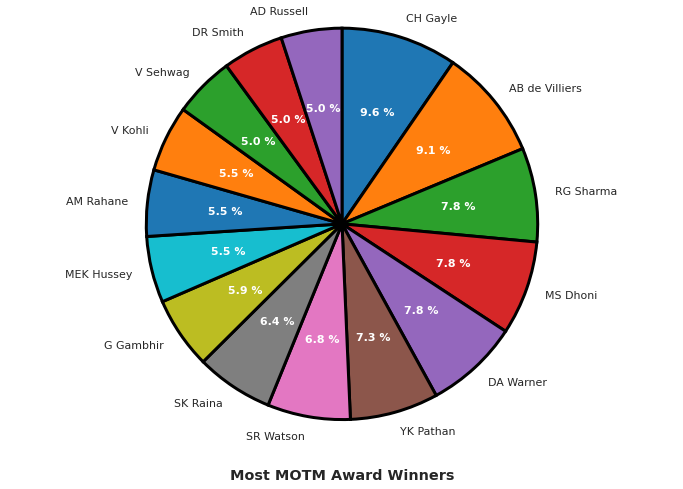

In [91]:
# Visualising the result.

labels = top_players.index
sizes = top_players.values
plt.title('Most MOTM Award Winners', y = -0.3, fontweight = 'bold')
plt.axis('equal')
patches, texts, pcts  = plt.pie(sizes, labels = labels, autopct = "%.1f %%", startangle = 90, counterclock = False, radius = 1.5, 
         wedgeprops = {'linewidth': 3.0, 'edgecolor': 'black'}, textprops={'fontsize': 11});
plt.setp(pcts, color='white', fontweight='bold');

1. `Gayle`, `Raina`, `Kohli`, `Gambhir`, `Warner` have been in three of the most amazing stats, thus, being very scary players to face.

2. Interestingly, there are `no bowlers` in this list.

### How Many Matches Were There Where The Toss Winner Also Won The Match?


In [92]:
# taking out only those records where the match winner was also the toss winner.

match_and_toss_winner_df = matches[(matches.toss_winner == matches.winner)]

In [93]:
# Finding out if there were any ties in the above dataframe.

match_and_toss_winner_df.result.unique()

array(['normal', 'tie'], dtype=object)

In [94]:
# Only keeping the matches that had normal (weren't tied and had a tiebreaker method to conclude the result) results.

match_and_toss_winner_df = match_and_toss_winner_df[match_and_toss_winner_df['result'] == 'normal']
match_and_toss_winner_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,loser,home_team,away_team
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Gujarat Lions,Gujarat Lions,Kolkata Knight Riders
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Rising Pune Supergiant,Neutral,Neutral
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,C Shamshuddin,CK Nandan,NaN,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,Gujarat Lions,Sunrisers Hyderabad,Gujarat Lions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,2019-05-05,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Bruce Oxenford,Sundaram Ravi,NaN,Sunrisers Hyderabad,Neutral,Neutral
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,Delhi Capitals,Neutral,Neutral


In [95]:
# Grouping the dataframe by winner and id and aggregating using count and sorting using count values.

match_and_toss_winner_df = match_and_toss_winner_df.groupby('winner')[['id']].count()
match_and_toss_winner_df = match_and_toss_winner_df.sort_values(by = 'id', ascending = False).reset_index()

In [96]:
match_and_toss_winner_df

,winner,id
0,Chennai Super Kings,57
1,Mumbai Indians,55
2,Kolkata Knight Riders,53
3,Rajasthan Royals,41
4,Royal Challengers Bangalore,40
5,Kings XI Punjab,34
6,Sunrisers Hyderabad,23
7,Deccan Chargers,19
8,Gujarat Lions,10
9,Delhi Capitals,6


So, there are `350` matches that have happened in IPL where the toss winner has also gone on to win the match out of 
which `Chennai Super Kings` have won the most, i.e, `57` matches, followed very closely by `Mumbai Indians` which has won `55` matches, which in turn is followed very closely by `Kolkata Knight Riders` which has won `53` matches.

### How Did The Top Bowlers Dismiss The Batsmen?

In [97]:
# Finding out different dismissal types.

w_types = deliveries_df.dismissal_kind.unique()

# Removing nan, run out, retired hurt from dismissal types list cause they are not awarded to the bowlers.

w = [1, 2, 4, 5, 6, 8]
w_types = [w_types[x] for x in w]

# 1. Using indexing, first finding out only those records that have the above dismissal types.
# 2. Then using groupby functionality, grouping the records by bowler and dismissal kind and aggregating using count.
# 3. Then unstacking the temp df so that it becomes easier to read.

temp = deliveries_df[deliveries_df['dismissal_kind'].isin(w_types)].groupby(by = ['bowler','dismissal_kind']).dismissal_kind.count().unstack(fill_value = 0)

# Then summing across columns to create a column total (the idea is to sort by the total (wickets) column in desc. order).

temp['total'] = temp.sum(axis=1)

# Sorting by the total column in descending order and then dropping it and only keeping the top 10 bowlers.

temp = temp.sort_values('total', ascending = False).drop('total', axis = 1).head(10)
print(temp)

dismissal_kind   bowled  caught  caught and bowled  hit wicket  lbw  stumped
bowler                                                                      
SL Malinga           63      91                  5           0   11        0
A Mishra             25      89                  3           0   13       26
Harbhajan Singh      29      84                 10           1    8       18
PP Chawla            43      72                  4           0   16       14
DJ Bravo             20     113                  8           0    6        0
B Kumar              35      84                  5           0    8        1
R Ashwin             22      78                  3           0   14        8
SP Narine            35      54                  7           0   16       10
UT Yadav             21      89                  0           0    9        0
RA Jadeja            27      59                  3           0   11        8


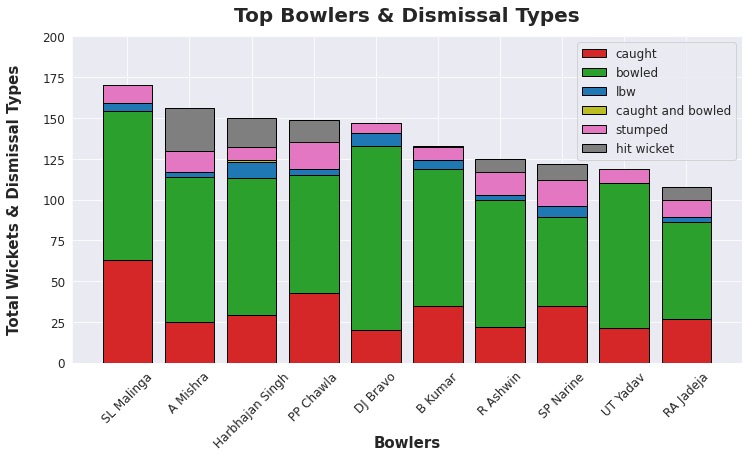

In [98]:
# Visusalising the above dataframe using stacked barchart.

x = temp.index
y1 = temp.bowled
y2 = temp.caught
y3 = temp['caught and bowled']
y4 = temp['hit wicket']
y5 = temp.lbw
y6 = temp.stumped

plt.bar(x, y1, color = 'tab:red', edgecolor = 'black')
plt.bar(x, y2, color = 'tab:green', bottom = y1, edgecolor = 'black')
plt.bar(x, y3, color = 'tab:blue', bottom = y1 + y2, edgecolor = 'black')
plt.bar(x, y4, color = 'tab:olive', bottom = y1 + y2 + y3, edgecolor = 'black')
plt.bar(x, y5, color = 'tab:pink', bottom = y1 + y2 + y3 + y4, edgecolor = 'black')
plt.bar(x, y6, color = 'tab:gray', bottom = y1 + y2 + y3 + y4 + y5, edgecolor = 'black')
plt.xticks(rotation=45)
plt.legend(w_types, loc = 1)
plt.ylim([0, 200])
plt.title('Top Bowlers & Dismissal Types',fontweight = 'bold', pad = 15, fontsize = 20)
plt.xlabel('Bowlers', labelpad = -15, fontweight='bold', fontsize = 15)
plt.ylabel('Total Wickets & Dismissal Types', labelpad = 20, fontweight='bold', fontsize = 15);

As we can see from the above visualisation, `SL Malinga` is the most dangerous bowler who bowls dismiss his opponents a lot.

### Who Were The Batsmen Who Struggled Against A Particular Bowler?

In [99]:
# Creating an empty dataframe with bowler, dismissal kind and batsman as columns.

max_dismissal = pd.DataFrame(columns = ["bowler", "dismissal_kind", "batsman"])

# Finding out all the batsmen that have played in the IPL.

batsmen = deliveries_df.batsman.unique()

# 1. picking out the data of each batsman from the above list one by one.
# 2. Filtering out data based on dismissal kind of that batsman.
# 3. Grouping by bowler and aggregating using count.
# 4. Sorting values by dismissal kind count (descending() and then picking out the bowler at the top.
# 5. Adding the current batsman to the column batsmen (after creating the column).
# 6. Concatenating using concat functionality of pandas (over x axis).


for x in batsmen:
    current = deliveries_df[deliveries_df['batsman'] == x]
    current = current[current['dismissal_kind'].isin(['caught', 'lbw', 'bowled', 'stumped', 'caught and bowled', "hit wicket"])]
    current = current.groupby('bowler').count()
    current = current.sort_values(by = 'dismissal_kind', ascending = 0).dismissal_kind[:1].reset_index()
    current['batsman'] = x
    max_dismissal = pd.concat([max_dismissal, current], ignore_index=True)

# Sorting values using dismissal kind count (descending), creating a max_dismissal df, renaming the columns & showing top 10
# bowlers who took a wicket of a particular batsman.
    
max_dismissal= max_dismissal.sort_values(by = 'dismissal_kind', ascending = 0, ignore_index = True)
max_dismissal= max_dismissal[["batsman", "bowler", "dismissal_kind"]]
max_dismissal.rename(columns = {'batsman' : 'Batsman', 'bowler' : 'Bowler', 'dismissal_kind' : 'Times_Dismissed'}, inplace = True)
max_dismissal.head(10)

,Batsman,Bowler,Times_Dismissed
0,MS Dhoni,Z Khan,7
1,PA Patel,B Kumar,6
2,AM Rahane,B Kumar,6
3,RG Sharma,SP Narine,6
4,RV Uthappa,R Ashwin,6
5,G Gambhir,Z Khan,6
6,V Kohli,A Nehra,6
7,AT Rayudu,MM Sharma,6
8,SPD Smith,RA Jadeja,5
9,SR Watson,A Mishra,5


1. As seen from the above table, `MS Dhoni` struggled against `Z Khan` the most and rest of the batsmen can be seen as well, struggling against some bowlers.
2.  `Z Khan` & `B Kumar` are in the top 10 twice.

### Who Were The Top 10 Batsmen Based On Runs Scored & Who Were The Top 10 Batsmen That Were Dismissed The Most?

In [100]:
#top batsmen according to runs
runs = deliveries_df.groupby(['batsman']).batsman_runs.sum().sort_values(ascending = False)
runs[:10]

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

1. Interestingly, apart from `MS Dhoni`, everybody else are openers (that is they bat at positions 1, 2 or 3), which makes this a feat for Dhoni considering he bats in the middle order.
2. `Raina`, `Kohli`, `Sharma`, `Gambhir`, `Warner`, `Uthappa`, `Gayle`have been in every good list so far.

In [101]:
# max number of times batsmen getting out
out = deliveries_df.groupby(['batsman']).is_wicket.sum().sort_values(ascending = False)
out[:10]

batsman
RG Sharma     162
SK Raina      161
RV Uthappa    157
V Kohli       152
KD Karthik    140
S Dhawan      137
G Gambhir     135
PA Patel      127
MS Dhoni      118
AM Rahane     117
Name: is_wicket, dtype: int64

`Raina`, `Kohli`, `Sharma`, `Gambhir`, `Warner`, `Uthappa` also get dismissed a lot too (though, after scoring a lot).

### Who Were The Top Batsmen Based On Batting Average?

> Indented block



Batting average of a player is defined as number of runs scored divided by the amount of times dismissed.

In [102]:
# Finding top batsmen based on batting average.

avg = (runs/out[:200]).sort_values(ascending = False)
avg[:15]

batsman
HM Amla           44.384615
AB de Villiers    42.576923
JP Duminy         41.653061
DA Warner         41.587719
CH Gayle          41.454545
KL Rahul          41.081633
LMP Simmons       39.962963
ML Hayden         39.535714
OA Shah           38.923077
KS Williamson     38.794118
SE Marsh          38.292308
MEK Hussey        38.019231
MS Dhoni          37.940678
JC Buttler        37.657895
A Symonds         37.461538
dtype: float64

1. `HM Amla, JP Duminy & AB de Villers` are out top batsmen based on batting average.
2. `Gayle`, `Warner`, `Kohli` make this list, too.

In [103]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aseembathla19/ipl-data-analysis-2008-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019


'https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019'

## Inferences & Conclusion

The above analysis gives us an overview of the IPL matches, stats of different players and some more enjoyable and knowledge facts about IPL from the Starting of IPL in the year 2008 upto 2019. The above observations contain a lot of information about a player in particular or a team as a whole.

With that, we’ve come to the end of this analysis. If you are a cricket lover, I am sure you have heard about IPL before, and for many of you it is one of the favourite games to enjoy with your family. It's fun as well exciting to discuss the results of the games you love and tell others the stories of the same, after going through this notebook you will have a lot more stories to tell about IPL and brag about your knowledge on the game. Hope you enjoyed!

In [104]:
import jovian

In [105]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aseembathla19/ipl-data-analysis-2008-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019


'https://jovian.ai/aseembathla19/ipl-data-analysis-2008-2019'

## References & Future Works
Thank you for coming this far, I hope you enjoyed my analysis on IPL matches and it helped you to learn a lot more about the game you love.

This Project is a part of the Course DATA SCIENCE WITH PYTHON (ZERO_TO_PANDAS), I would like to express my gratitude towards the Jovian.ml Course Team and the Instructor Aakash NS for giving me an Oppurtunity to do a project like this. To know more about the course follow the link here.

I would like to express my gratitude to Aakash NS and the whole Jovian.ml team for giving me an Oppurtunity to make such an wonderful data exploratory project. Follow Jovian forum to know more about different courses on Data Science, ML etc. and connect with a huge community of students and enthusiasts.

## Future Work

There are lot of scopes of improvement and/or addition in this project in future, with the data provided and adding extra datasets we can,

Make a better team statistics which shows Run Rate of each team and overall position or value the team has in IPL.
Predict the costs of players in next seasons of ipl using the data of the players and with the knowledge of the cost of the players in the previous seasons.
Add observation for peak over to score in IPL and overs in which most dismissals takes place can be made using data manipulations.
Also we can add the dataset of 2020 IPL, observe and compare how the performance of players and teams changes by modifying only few lines of code (more the data, merrier the visualization).


## REFERENCES

IPL 2008-2019 Dataset: https://www.kaggle.com/nowke9/ipldata

Kaggle Datasets (Choose Dataset of your choice): https://www.kaggle.com/datasets

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Data analysis guide(https://jovian.ml/aakashns/python-pandas-data-analysis)

Jovian Forum (Ask Questions in this great community): https://jovian.ml/forum/

Stackoverflow Community (Get answers of any problems): https://stackoverflow.com/questions

Python solutions in Geeksforgeeks (Solutions made easy): https://www.geeksforgeeks.org/python-programming-language/

opendatasets Python library (Choosing and using datasets in python made easy): https://github.com/JovianML/opendatasets

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>